# Assignmnet 3 (100 + 5 points)

**Name:** <br>
**Email:** <br>
**Group:** A/B <br>
**Hours spend *(optional)* :** <br>

<h3> Submission </h3>

Submit your files in a zip file : firstname_lastname.zip. !!!

# Question 1: Word Embeddings (Word2Vec) *(30 points)*

Word2Vec is a popular technique in natural language processing (NLP) for learning vector representations of words, also known as word embeddings. These embeddings capture semantic relationships between words, such that words used in similar contexts are placed close to each other in the vector space.

There are two main architectures for Word2Vec:

- **Continuous Bag-of-Words (CBOW):** Predicts the current word based on its context (surrounding words).
- **Skip-Gram:** Predicts surrounding words given the current word.

In this tutorial, you will implement a simplified version of the Skip-Gram model using Python and train it on a given dataset.

---

## Your Task:

#### **Data Preparation:**

- Given a corpus of text (word2vec_dataset.en) attached, preprocess the data to create training examples suitable for a Skip-Gram model.
- Implement functions to tokenize the text, build a vocabulary, and generate input-output pairs for training.

#### **Implement a Simple Skip-Gram Model:**

- implement a simple neural network representing the Skip-Gram architecture.
- The model should learn word embeddings by training on the generated input-output pairs.

#### **Train the Model:**

- Train your Skip-Gram model on the prepared data.
- Use appropriate loss functions and optimization algorithms.

#### **Visualize Word Embeddings:**

- After training, visualize the learned word embeddings in 2D space using techniques like PCA or t-SNE.
- Plot the words to observe how similar words are positioned relative to each other.


#### **Notes:**

- If the training process is slow, consider reducing the size of the dataset to improve training speed.

### Allowed Libraries:
- **collections** for building vocabulary.
- **NumPy:** For numerical computations.
- **Matplotlib:** For plotting and visualization.
- **scikit-learn (sklearn):** For dimensionality reduction techniques like PCA or t-SNE, evaluation metrics.
- **TensorFlow or PyTorch** if you prefer to implement the model using these frameworks. However, since the challenge aims to be simple and educational, using NumPy suffices.




Epoch 1, Loss: 8.2390
Epoch 2, Loss: 8.2360
Epoch 3, Loss: 8.2080
Epoch 4, Loss: 7.9328
Epoch 5, Loss: 7.1257


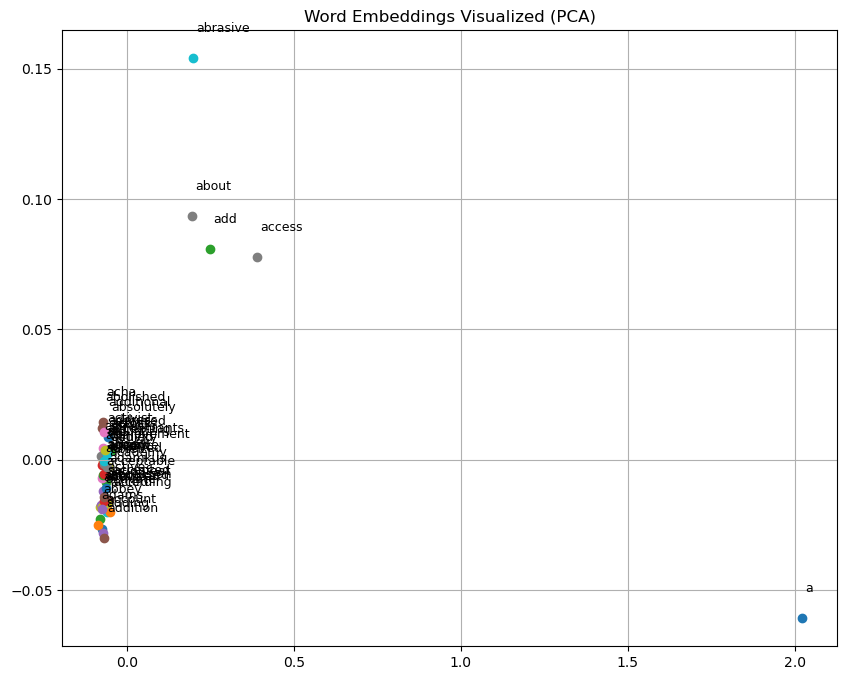

In [ ]:
import re
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load and preprocess text
with open("word2vec_dataset.en", "r", encoding="utf-8") as file:
    text_data = file.read()

def tokenize(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text.split()

tokens = tokenize(text_data)
word_counts = Counter(tokens)
vocab = sorted(word_counts)
word2idx = {word: idx for idx, word in enumerate(vocab)}
idx2word = {idx: word for word, idx in word2idx.items()}
vocab_size = len(vocab)

# Generate Skip-Gram pairs
def generate_skipgram_pairs(tokens, window_size=2):
    pairs = []
    for i, word in enumerate(tokens):
        center = word2idx[word]
        for j in range(-window_size, window_size + 1):
            if j != 0 and 0 <= i + j < len(tokens):
                context = word2idx[tokens[i + j]]
                pairs.append((center, context))
    return pairs

pairs = generate_skipgram_pairs(tokens, window_size=2)
pairs = pairs[:3000]  # Reduce size for quick training

# Define Skip-Gram model
class SkipGramModel:
    def __init__(self, vocab_size, embedding_dim):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W1 = np.random.randn(vocab_size, embedding_dim) * 0.01
        self.W2 = np.random.randn(embedding_dim, vocab_size) * 0.01

    def _softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / np.sum(e_x)

    def forward(self, center_idx):
        x = np.zeros(self.vocab_size)
        x[center_idx] = 1
        h = np.dot(x, self.W1)
        u = np.dot(h, self.W2)
        y_pred = self._softmax(u)
        return y_pred, h, x

    def compute_loss(self, y_pred, target_idx):
        return -np.log(y_pred[target_idx] + 1e-9)

    def backward(self, y_pred, h, x, target_idx, lr=0.01):
        e = y_pred
        e[target_idx] -= 1
        dW2 = np.outer(h, e)
        dW1 = np.outer(x, np.dot(self.W2, e))
        self.W1 -= lr * dW1
        self.W2 -= lr * dW2

    def train(self, pairs, epochs=5, lr=0.05):
        for epoch in range(epochs):
            loss = 0
            for center, context in pairs:
                y_pred, h, x = self.forward(center)
                loss += self.compute_loss(y_pred, context)
                self.backward(y_pred, h, x, context, lr)
            print(f"Epoch {epoch+1}, Loss: {loss / len(pairs):.4f}")

model = SkipGramModel(vocab_size, embedding_dim=50)
model.train(pairs, epochs=5, lr=0.05)

# Visualize embeddings using PCA
def plot_embeddings(model, word2idx, idx2word, num_words=50):
    embeddings = model.W1
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(embeddings[:num_words])

    plt.figure(figsize=(10, 8))
    for i in range(num_words):
        plt.scatter(reduced[i, 0], reduced[i, 1])
        plt.text(reduced[i, 0]+0.01, reduced[i, 1]+0.01, idx2word[i], fontsize=9)
    plt.title("Word Embeddings Visualized (PCA)")
    plt.grid(True)
    plt.show()

plot_embeddings(model, word2idx, idx2word)


# Question 2: Transformer model *(70 points)*

As a Machine Learning engineer at a tech company, you were given a task to develop a machine translation system that translates **English (source) to German (Target)**. You have the freedom to select any dataset for training the model. Use a small subset of data as a validation dataset and report the BLEU score on the validation set.

Also, provide a short description of your transformer model architecture, hyperparameters, and training (also provide the train-validation loss curve). Write your findings and analysis in paragraphs.


**Dataset**

Here are some of the parallel datasets (see Datasets and Resources file):
* Europarl Parallel corpus - https://www.statmt.org/europarl/v7/de-en.tgz
* News Commentary - https://www.statmt.org/wmt14/training-parallel-nc-v9.tgz (use DE-EN parallel data)
* Common Crawl corpus - https://www.statmt.org/wmt13/training-parallel-commoncrawl.tgz (use DE-EN parallel data)

You can also use other datasets of your choice. In this case please add the dataset you used to the submission zip file.

In the above datasets, **'.en'** file has the text in English, and **'.de'** file contains their corresponding German translations.



## Notes:
1. You can also consider using a small subset of the dataset if the training dataset is large
2. Sometimes you can also get out of memory errors while training, so choose the hyperparameters carefully.
3. Your training will be much faster if you use a GPU (Edit -> Notebook settings). If you are using a CPU, it may take several hours or even days. (you can also use Google Colab GPUs for training. link: https://colab.research.google.com/)
4. It is a best practise to leverage vector representations learned in Q1 in your training as starting point for the embedding layer.




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=46c59d99b7b6220739bd7f291fba8f2399859e75defdbc50b9adffa9f3b133fc
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  7.88it/s]


Epoch 1, Train Loss: 7.0893, Validation BLEU: 7.5642


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.05it/s]


Epoch 2, Train Loss: 6.5403, Validation BLEU: 7.5642


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.79it/s]


Epoch 3, Train Loss: 6.1158, Validation BLEU: 15.9162


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  7.98it/s]


Epoch 4, Train Loss: 4.9672, Validation BLEU: 10.9093


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.51it/s]


Epoch 5, Train Loss: 4.1890, Validation BLEU: 9.6014


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  7.93it/s]


Epoch 6, Train Loss: 3.6317, Validation BLEU: 8.6211


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  7.94it/s]


Epoch 7, Train Loss: 3.1617, Validation BLEU: 8.3926


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.30it/s]


Epoch 8, Train Loss: 2.7219, Validation BLEU: 8.5068


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.08it/s]


Epoch 9, Train Loss: 2.3044, Validation BLEU: 8.2120


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.66it/s]


Epoch 10, Train Loss: 1.9185, Validation BLEU: 8.1808


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.07it/s]


Epoch 11, Train Loss: 1.5713, Validation BLEU: 8.3829


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.71it/s]


Epoch 12, Train Loss: 1.2811, Validation BLEU: 8.3337


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.03it/s]


Epoch 13, Train Loss: 1.0406, Validation BLEU: 4.7875


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.09it/s]


Epoch 14, Train Loss: 0.8452, Validation BLEU: 4.7875


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.62it/s]


Epoch 15, Train Loss: 0.6830, Validation BLEU: 4.7529


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.06it/s]


Epoch 16, Train Loss: 0.5508, Validation BLEU: 4.8544


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.71it/s]


Epoch 17, Train Loss: 0.4432, Validation BLEU: 4.7529


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.17it/s]


Epoch 18, Train Loss: 0.3541, Validation BLEU: 4.9500


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.16it/s]


Epoch 19, Train Loss: 0.2842, Validation BLEU: 4.8869


Evaluating: 100%|██████████| 63/63 [00:07<00:00,  8.72it/s]


Epoch 20, Train Loss: 0.2242, Validation BLEU: 4.9187


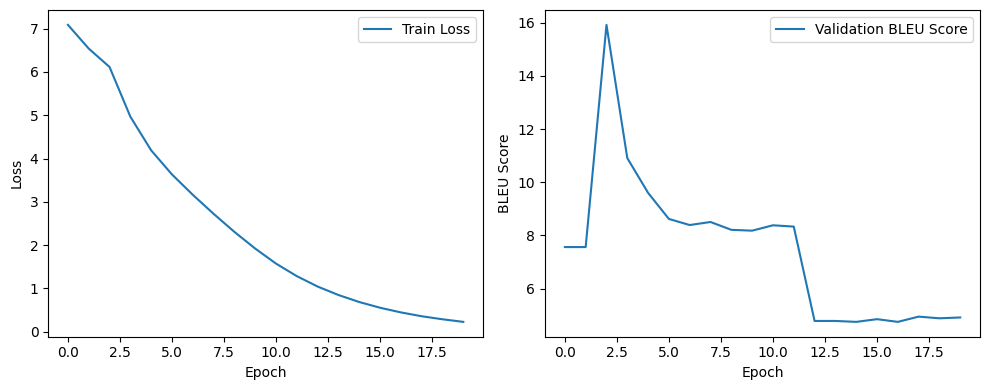

In [1]:
!pip install sacrebleu wget
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.nn.utils.rnn import pad_sequence
from torch.amp import GradScaler, autocast
import matplotlib.pyplot as plt
import re
from collections import Counter
from tqdm import tqdm
import sacrebleu
import wget
import math

# Constants: Adjust as needed
VOCAB_SIZE = 10000
BATCH_SIZE = 32
EPOCHS = 20
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Simple whitespace tokenizer
def tokenize(sentence):
    return re.findall(r'\w+', sentence.lower())

# Generate vocabulary
def build_vocab(sentences, vocab_size):
    counter = Counter()
    for sentence in sentences:
        counter.update(tokenize(sentence))
    most_common = counter.most_common(vocab_size - 4)
    vocab = {"<pad>": 0, "<unk>": 1, "<bos>": 2, "<eos>": 3}
    vocab.update({word: i + 4 for i, (word, _) in enumerate(most_common)})
    return vocab

def encode(sentence, vocab, add_specials=True):
    tokens = tokenize(sentence)
    if add_specials:
        tokens = ["<bos>"] + tokens + ["<eos>"]
    return [vocab.get(token, vocab["<unk>"]) for token in tokens]

def decode(tokens, vocab):
    index2word = {i: word for word, i in vocab.items()}
    return ' '.join(index2word[token] for token in tokens if token in index2word)

class TranslationDataset(Dataset):
    def __init__(self, src_data, tgt_data, src_vocab, tgt_vocab):
        self.src_data = src_data
        self.tgt_data = tgt_data
        self.src_vocab = src_vocab
        self.tgt_vocab = tgt_vocab

    def __len__(self):
        return len(self.src_data)

    def __getitem__(self, index):
        src_seq = encode(self.src_data[index], self.src_vocab)
        tgt_seq = encode(self.tgt_data[index], self.tgt_vocab)
        return torch.tensor(src_seq), torch.tensor(tgt_seq)

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(1), :]
        return self.dropout(x)

class TransformerModel(nn.Module):
    def __init__(self, ntoken, d_model, nhead, nhid, nlayers, dropout=0.5):
        super(TransformerModel, self).__init__()
        self.d_model = d_model
        self.pos_encoder = PositionalEncoding(d_model, dropout)
        self.encoder = nn.Embedding(ntoken, d_model)
        self.transformer = nn.Transformer(
            d_model=d_model,
            nhead=nhead,
            num_encoder_layers=nlayers,
            num_decoder_layers=nlayers,
            dim_feedforward=nhid,
            dropout=dropout,
            batch_first=True
        )
        self.decoder = nn.Linear(d_model, ntoken)
        self.init_weights()

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, tgt, src_mask=None, tgt_mask=None):
        src = self.encoder(src) * math.sqrt(self.d_model)
        src = self.pos_encoder(src)
        tgt = self.encoder(tgt) * math.sqrt(self.d_model)
        tgt = self.pos_encoder(tgt)
        output = self.transformer(src, tgt, src_mask=src_mask, tgt_mask=tgt_mask)
        output = self.decoder(output)
        return output

def collate_fn(batch):
    src_batch, tgt_batch = zip(*batch)
    src_batch = pad_sequence(src_batch, padding_value=0)
    tgt_batch = pad_sequence(tgt_batch, padding_value=0)
    return src_batch.transpose(0, 1), tgt_batch.transpose(0, 1)

def train(model, dataloader, vocab_size, optimizer, criterion, scaler):
    model.train()
    total_loss = 0
    for src_texts, tgt_texts in tqdm(dataloader, desc="Training"):
        src_texts = src_texts.to(DEVICE)
        tgt_texts = tgt_texts.to(DEVICE)
        optimizer.zero_grad()
        src_mask = generate_square_subsequent_mask(src_texts.size(1)).to(DEVICE)
        tgt_mask = generate_square_subsequent_mask(tgt_texts.size(1)).to(DEVICE)
        with autocast(device_type='cuda'):
            output = model(src_texts, tgt_texts, src_mask, tgt_mask)
            loss = criterion(output.reshape(-1, vocab_size), tgt_texts.reshape(-1))
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        total_loss += loss.item()
    return total_loss / len(dataloader)

def evaluate_bleu(model, dataloader, vocab):
    model.eval()
    all_translations = []
    all_references = []
    with torch.no_grad():
        for src_texts, tgt_texts in tqdm(dataloader, desc="Evaluating"):
            src_texts = src_texts.to(DEVICE)
            src_mask = generate_square_subsequent_mask(src_texts.size(1)).to(DEVICE)
            outputs = model(src_texts, src_texts, src_mask)
            predicted_tokens = torch.argmax(outputs, dim=2)

            # Assemble predictions and references
            for pred, tgt in zip(predicted_tokens, tgt_texts):
                hypothesis = decode(pred.tolist(), vocab)
                reference = decode(tgt.tolist(), vocab)
                all_translations.append(hypothesis)  # Hypothesis as a single string
                all_references.append([reference])  # Reference nested in list

    # Pass the corpus references as a list of lists and translations as a list of strings
    bleu_score = sacrebleu.corpus_bleu(all_translations, all_references)
    return bleu_score.score

def generate_square_subsequent_mask(sz):
    mask = torch.triu(torch.ones((sz, sz), device=DEVICE) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask

def main():

    # Load data from files
    with open("/content/europarl-v7.de-en.en", "r", encoding="utf8") as f:
        src_data = f.readlines()
    with open("/content/europarl-v7.de-en.de", "r", encoding="utf8") as f:
        tgt_data = f.readlines()

    # Use a smaller subset for quick experimentation
    src_data = src_data[:10000]
    tgt_data = tgt_data[:10000]

    # Build vocabularies
    src_vocab = build_vocab(src_data, VOCAB_SIZE)
    tgt_vocab = build_vocab(tgt_data, VOCAB_SIZE)

    # Create dataset
    full_dataset = TranslationDataset(src_data, tgt_data, src_vocab, tgt_vocab)
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    # Initialize model and other components
    model = TransformerModel(len(src_vocab), d_model=512, nhead=8, nhid=2048, nlayers=6, dropout=0.5).to(DEVICE)
    criterion = nn.CrossEntropyLoss(ignore_index=0)
    optimizer = optim.AdamW(model.parameters(), lr=0.0001)
    scaler = GradScaler(device=DEVICE)

    train_losses = []
    val_bleus = []

    # Training loop
    for epoch in range(EPOCHS):
        train_loss = train(model, train_loader, len(tgt_vocab), optimizer, criterion, scaler)
        val_bleu = evaluate_bleu(model, val_loader, tgt_vocab)
        train_losses.append(train_loss)
        val_bleus.append(val_bleu)
        print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Validation BLEU: {val_bleu:.4f}')

    # Plotting loss curve
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_bleus, label='Validation BLEU Score')
    plt.xlabel('Epoch')
    plt.ylabel('BLEU Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

### Additional Experiments *(5 additional points - <span style="color: red;">Optional</span>)*